In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
import matplotlib as mpl
import numpy as np
import matplotlib.image as mpimg
import numpy as np

# Files to load
athlete_data = "data/cleaned_athlete_gdp_sanction_data.csv"
medal_data = "data/nations_final.csv"

In [2]:
# Athlete performance
athletes_df = pd.read_csv(athlete_data)
print(athletes_df.shape)
athletes_df.head()

(188046, 24)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Medal_Type,Medal,Row,Employment,Population,UnemploymentRate,GDP,DateofInfraction,IneligibilityUntil,LifetimeBan
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,No_Medal,N,2,0.000,1171.710,2.300,492.155,0.0,0.0,0.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,No_Medal,N,3,0.000,1354.040,4.090,8539.470,0.0,0.0,0.0
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,No_Medal,N,4,6.093,14.715,6.247,264.223,0.0,0.0,0.0
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,No_Medal,N,5,6.093,14.715,6.247,264.223,0.0,0.0,0.0
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,...,No_Medal,N,6,6.648,15.129,4.865,366.004,0.0,0.0,0.0


In [3]:
athletes_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal_Type', 'Medal',
       'Row', 'Employment', 'Population', 'UnemploymentRate', 'GDP',
       'DateofInfraction', 'IneligibilityUntil', 'LifetimeBan'],
      dtype='object')

In [4]:
athletes_df.Medal_Type.unique()

array(['No_Medal', 'Bronze', 'Gold', 'Silver'], dtype=object)

In [5]:
# Nations performance
medals_df = pd.read_csv(medal_data)
print(medals_df.shape)
medals_df.head()

(2047, 18)


,NOC,Team,Games,Year,GDP,Population,Sports,Events,Athletes per Event,Median Competitor Age,Median Competitor Height,Median Competitor Weight,Summer,Home_Field_Adv,Golds,Silvers,Bronzes,Total Medals
0,ALG,Algeria,1980 Summer,1980,42.346,18.666,9,27,1.778,23.0,175.0,67.0,1,0,0,0,0,0
1,ANG,Angola,1980 Summer,1980,6.639,8.910,3,14,0.786,18.0,169.0,63.0,1,0,0,0,0,0
2,AUS,Australia,1980 Summer,1980,162.628,14.802,17,92,1.304,22.0,179.5,71.0,1,0,6,2,5,13
3,AUT,Austria,1980 Summer,1980,80.923,7.540,16,51,1.627,23.0,178.0,71.0,1,0,1,3,1,5
4,BEL,Belgium,1980 Summer,1980,123.478,9.855,10,51,1.157,22.0,175.5,68.5,1,0,1,0,0,1


In [6]:
medals_df.columns

Index(['NOC', 'Team', 'Games', 'Year', 'GDP', 'Population', 'Sports', 'Events',
       'Athletes per Event', 'Median Competitor Age',
       'Median Competitor Height', 'Median Competitor Weight', 'Summer',
       'Home_Field_Adv', 'Golds', 'Silvers', 'Bronzes', 'Total Medals'],
      dtype='object')

In [7]:
medals_df.Games.unique()

array(['1980 Summer', '1980 Winter', '1984 Summer', '1984 Winter',
       '1988 Summer', '1988 Winter', '1992 Summer', '1992 Winter',
       '1994 Winter', '1996 Summer', '1998 Winter', '2000 Summer',
       '2002 Winter', '2004 Summer', '2006 Winter', '2008 Summer',
       '2010 Winter', '2012 Summer', '2014 Winter', '2016 Summer'],
      dtype=object)

## Olympic Athletes

In [8]:
# Create separate columns for each medal type
athletes_df['Gold'] = athletes_df['Medal_Type'] == 'Gold'
athletes_df['Silver'] = athletes_df['Medal_Type'] == 'Silver'
athletes_df['Bronze'] = athletes_df['Medal_Type'] == 'Bronze'

# Convert No Medal Type to NaN for distribution calculations
athletes_df['Medal_Type'] = athletes_df['Medal_Type'].map({'No_Medal': np.nan,
                                                          'Gold': 'Gold',
                                                          'Silver': 'Silver',
                                                          'Bronze': 'Bronze'})

# Find the number of unique athletes 
unique = pd.DataFrame(athletes_df.groupby(['Name', 'NOC', 'Team'])['Medal_Type'].count())['Medal_Type'].value_counts().sum()
print(unique)

92725


In [9]:
athletes_df['Medal_Type'].unique()

array([nan, 'Bronze', 'Gold', 'Silver'], dtype=object)

In [10]:
# The number of medals won by an individual athlete

medals_won = pd.DataFrame(athletes_df.groupby(['Name', 'NOC', 'Team'])['Medal_Type'].count())['Medal_Type'].value_counts()
medals_won =medals_won.to_frame()
medals_won.index.name= 'Historical Olympic Medals Won'
medals_won = medals_won.rename(columns={'Medal_Type': 'Number of Athletes'})

# Percent Distribution of medals won by individual athletes
medals_won['% of Athletes'] = (medals_won['Number of Athletes']/unique * 100).round(3)
medals_won['Percentile'] = medals_won['% of Athletes'].cumsum()
medals_won

# Save and export dataframe
dfi.export(medals_won, "images/athlete_distribution")

medals_won

,Number of Athletes,% of Athletes,Percentile
Historical Olympic Medals Won,,,
0,73849,79.643,79.643
1,14036,15.137,94.780
2,3208,3.460,98.240
3,938,1.012,99.252
4,392,0.423,99.675
5,132,0.142,99.817
6,77,0.083,99.900
7,33,0.036,99.936
8,25,0.027,99.963


## Summer vs Winter Games?

In [11]:
summer = medals_df[medals_df['Summer'] == 1].groupby('Games').sum()
# summer.head()
drop_cols = ['GDP', 'Population', 'Median Competitor Age', 'Median Competitor Height', 'Median Competitor Weight', 'Year', 'Summer', 'Home_Field_Adv']
summer = summer.drop(drop_cols, axis=1)
summer = summer.reset_index()
# summer.head()
summer = summer.merge(athletes_df[['Games', 'Season', 'Year']].drop_duplicates())
summer.head()

,Games,Sports,Events,Athletes per Event,Golds,Silvers,Bronzes,Total Medals,Season,Year
0,1980 Summer,433,2171,81.736,102,183,240,525,Summer,1980
1,1984 Summer,779,3731,140.376,419,390,403,1212,Summer,1984
2,1988 Summer,910,4379,136.685,256,322,325,903,Summer,1988
3,1992 Summer,944,4556,146.781,365,419,453,1237,Summer,1992
4,1996 Summer,1209,5654,201.784,523,535,572,1630,Summer,1996


In [12]:
winter = medals_df[medals_df['Summer'] == 0].groupby('Games').sum()
winter = winter.drop(drop_cols, axis=1)
winter = winter.reset_index()
winter = winter.merge(athletes_df[['Games', 'Season', 'Year']].drop_duplicates())
winter.head()

,Games,Sports,Events,Athletes per Event,Golds,Silvers,Bronzes,Total Medals,Season,Year
0,1980 Winter,112,346,36.257,35,29,42,106,Winter,1980
1,1984 Winter,148,475,44.287,29,19,45,93,Winter,1984
2,1988 Winter,145,525,38.839,33,43,54,130,Winter,1988
3,1992 Winter,207,807,50.311,67,97,61,225,Winter,1992
4,1994 Winter,262,998,63.249,105,108,111,324,Winter,1994


In [13]:
# Concat summer and winter for visualization of medal counts
sw = pd.concat([summer, winter])
#sw.head()
sw = sw.reset_index().drop('index', axis=1)
sw.sample(n=10)

,Games,Sports,Events,Athletes per Event,Golds,Silvers,Bronzes,Total Medals,Season,Year
15,1998 Winter,327,1154,83.334,144,144,149,437,Winter,1998
5,2000 Summer,1461,6565,211.748,624,621,639,1884,Summer,2000
7,2008 Summer,1621,6709,255.775,660,624,687,1971,Summer,2008
11,1984 Winter,148,475,44.287,29,19,45,93,Winter,1984
3,1992 Summer,944,4556,146.781,365,419,453,1237,Summer,1992
18,2010 Winter,405,1603,80.676,173,172,170,515,Winter,2010
13,1992 Winter,207,807,50.311,67,97,61,225,Winter,1992
4,1996 Summer,1209,5654,201.784,523,535,572,1630,Summer,1996
19,2014 Winter,397,1742,80.842,190,190,190,570,Winter,2014
8,2012 Summer,1625,6530,230.368,609,620,660,1889,Summer,2012


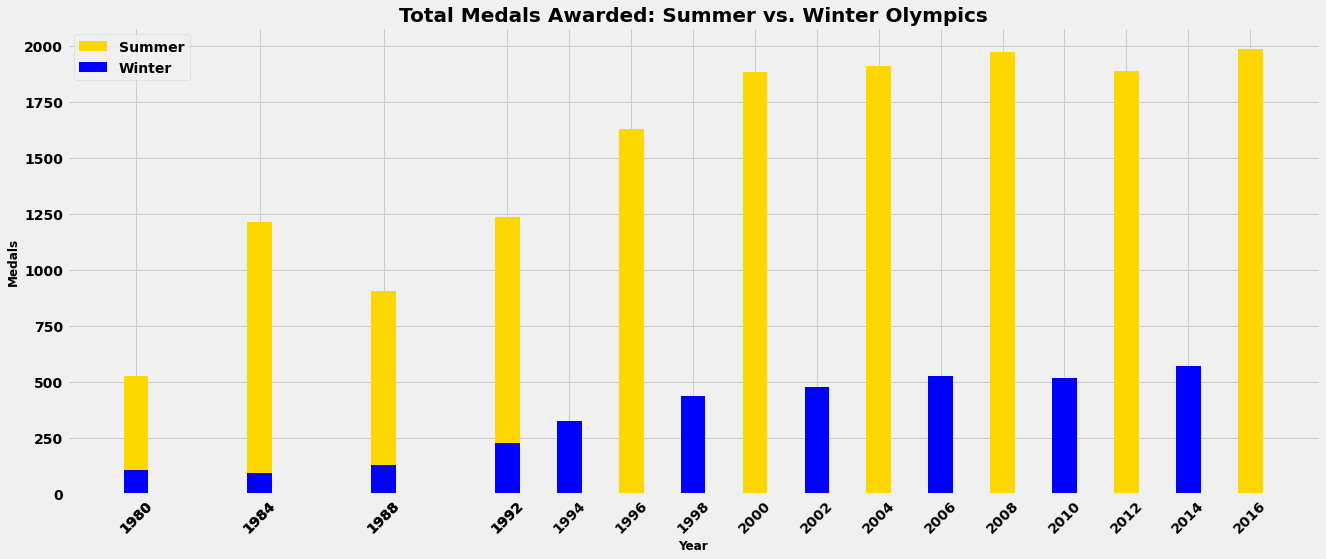

In [14]:
# Plot total medal counts over the years for summer vs winter
from matplotlib import style
style.use('fivethirtyeight')

plt.subplots(figsize=(20, 8))

x1= sw[sw['Season'] == 'Summer']['Year']
x2 = sw[sw['Season'] == 'Winter']['Year']
y1 = sw[sw['Season'] == 'Summer']['Total Medals']
y2 = sw[sw['Season'] == 'Winter']['Total Medals']

# Add summer plot
plt.bar(x1, y1, color='gold', label='Summer')
# Add winter plot
plt.bar(x2, y2, color='blue', label='Winter')

plt.xticks(sw['Year'], rotation=45)
plt.title('Total Medals Awarded: Summer vs. Winter Olympics', fontsize=20)
plt.ylabel('Medals', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.legend(['Summer', 'Winter'])

# Save the figure
plt.savefig('images/summer_winter')
plt.show()


## Medals by Nation

In [15]:
# Distribution of medals won by nation and given percentiles
country = medals_df.groupby(['NOC', 'Team'])[['Total Medals', 'Golds', 'Silvers', 'Bronzes']].sum()
country = country.sort_values(by="Total Medals", ascending=False).reset_index()
#country.head()

total_medal_count = medals_df['Total Medals'].sum()
country['% Medals Won'] = (country["Total Medals"]/total_medal_count * 100).round(3)
top_nations = country.sort_values(by="% Medals Won", ascending=False)


print(f"Top 20 Medaling Nations: Percentage of All Medals Won")
print(f"{round(sum(country['% Medals Won'].head(20)),3)} %")

top_nations.head(20)

Top 20 Medaling Nations: Percentage of All Medals Won
80.843 %


,NOC,Team,Total Medals,Golds,Silvers,Bronzes,% Medals Won
0,USA,United States,2761,1274,823,664,14.887
1,GER,Germany,1262,460,369,433,6.805
2,RUS,Russia,1132,379,356,397,6.104
3,CHN,China,985,350,345,290,5.311
4,AUS,Australia,981,262,322,397,5.290
5,CAN,Canada,860,312,288,260,4.637
6,ITA,Italy,738,205,244,289,3.979
7,GBR,Great Britain,734,235,233,266,3.958
8,FRA,France,712,220,215,277,3.839
9,NED,Netherlands,600,193,215,192,3.235


## Home Team Advantage as a factor?

In [25]:
host = medals_df[medals_df['Home_Field_Adv'] == 1].groupby(['Games', 'NOC', 'Team']).sum()
#home.head()
drop_cols = ['GDP', 'Population', 'Median Competitor Age', 'Median Competitor Height', 'Median Competitor Weight', 'Year', 'Summer', 'Home_Field_Adv']
host = host.drop(drop_cols, axis=1).reset_index()
host['Host'] = 'Host'
host.head()

,Games,NOC,Team,Sports,Events,Athletes per Event,Golds,Silvers,Bronzes,Total Medals,Host
0,1980 Winter,USA,United States,10,38,2.395,24,4,1,29,Host
1,1984 Summer,USA,United States,25,216,2.407,186,116,50,352,Host
2,1988 Summer,KOR,South Korea,27,216,1.843,28,37,12,77,Host
3,1988 Winter,CAN,Canada,10,45,2.400,0,2,4,6,Host
4,1992 Summer,ESP,Spain,27,161,1.702,26,15,2,43,Host


In [26]:
guest = medals_df[medals_df['Home_Field_Adv'] == 0].groupby(['Games', 'NOC', 'Team']).sum()
guest = guest.drop(drop_cols, axis=1).reset_index()
guest['Host'] = 'Guest'
guest.head()

,Games,NOC,Team,Sports,Events,Athletes per Event,Golds,Silvers,Bronzes,Total Medals,Host
0,1980 Summer,ALG,Algeria,9,27,1.778,0,0,0,0,Guest
1,1980 Summer,ANG,Angola,3,14,0.786,0,0,0,0,Guest
2,1980 Summer,AUS,Australia,17,92,1.304,6,2,5,13,Guest
3,1980 Summer,AUT,Austria,16,51,1.627,1,3,1,5,Guest
4,1980 Summer,BEL,Belgium,10,51,1.157,1,0,0,1,Guest


In [23]:
# Merge data frames
host_guest = pd.concat([home, away])
host_guest

,Games,NOC,Team,Sports,Events,Athletes per Event,Golds,Silvers,Bronzes,Total Medals,Host
0,1980 Winter,USA,United States,10,38,2.395,24,4,1,29,Host
1,1984 Summer,USA,United States,25,216,2.407,186,116,50,352,Host
2,1988 Summer,KOR,South Korea,27,216,1.843,28,37,12,77,Host
3,1988 Winter,CAN,Canada,10,45,2.400,0,2,4,6,Host
4,1992 Summer,ESP,Spain,27,161,1.702,26,15,2,43,Host
...,...,...,...,...,...,...,...,...,...,...,...
2024,2016 Summer,VEN,Venezuela,19,76,1.105,0,1,2,3,Guest
2025,2016 Summer,VIE,Vietnam,10,24,0.917,1,1,0,2,Guest
2026,2016 Summer,YEM,Yemen,3,3,1.000,0,0,0,0,Guest
2027,2016 Summer,ZAM,Zambia,3,6,1.000,0,0,0,0,Guest


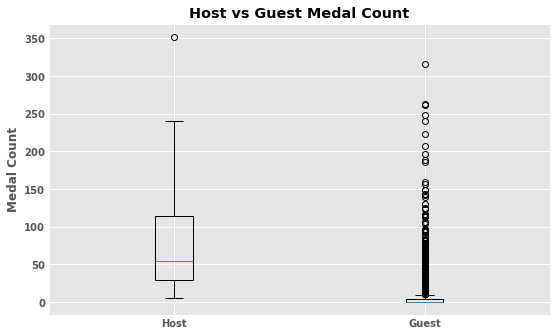

In [41]:
# Plot differences in central tendency measures for host vs guest country
data1 = host['Total Medals'].values
data2 = guest['Total Medals'].values
labels = host_guest['Host'].unique()

data = [data1, data2]

style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Host vs Guest Medal Count')
ax.set_ylabel('Medal Count')
ax.boxplot(data, labels=labels)

# Save figure
plt.savefig("images/host_guest.png")
plt.show()